### Check if a number is prime

Time complexity: $O(\sqrt n)$
Space complexity: $O(1)$

In [1]:
import math


def is_prime(n: int) -> bool:
    """
    Every composite number has a factor less than or equal to its square root.
    That is, if n is composite, then n has a prime factor p <= sqrt(n).

    Sources: http://mathandmultimedia.com/2012/06/02/determining-primes-through-square-root/
    """
    if n <= 1:
        return False
    if n == 2:
        return True

    for i in range(2, int(math.sqrt(n))+1):
        if n % i == 0:
            return False

    return True

In [2]:
assert is_prime(11) == True
assert is_prime(13) == True


In [3]:
assert is_prime(2069) == True

In [ ]:
for num in range(0, 1000):
    if is_prime(num):
       print(f"{num} is prime.")

### Fermat's little Theorem
If $p$ is a prime number, then

$a^{p-1} \equiv 1 \ \ (mod \ p)$

for $1 \leq a \leq p - 1$

In [4]:
pseudoprimes = [

]

def is_prime_fermat(p: int) -> int:
    """
    Sources: https://stackoverflow.com/questions/29595849/explain-a-code-to-check-primality-based-on-fermats-little-theorem
    https://en.wikipedia.org/wiki/Baillie–PSW_primality_test
    https://en.wikipedia.org/wiki/Fermat_pseudoprime
    """
    if p <= 1:
        return False
    if p == 2:
        return True
    if p % 2 == 0:
        return False
    # a = 2

    a = 2
    # a^(p-1) is congruent to 1 (mod p), a = 2
    return pow(a, p-1, p) == 1

In [5]:
is_prime_fermat(13)

True

In [7]:
# for i in range(1, 1000):
    # assert is_prime(i) == is_prime_fermat(i), f"Error: is_prime({i}) = {is_prime(i)}, is_prime_fermat({i}) = {is_prime_fermat(i)}"

### Primality Test | Set 2
Source: [https://www.geeksforgeeks.org/primality-test-set-2-fermet-method/](https://www.geeksforgeeks.org/primality-test-set-2-fermet-method/)
// Higher value of k indicates probability of correct
// results for composite inputs become higher. For prime
// inputs, result is always correct
1) Repeat following k times:
      a) Pick a random $a$ in the range [2, $n$ - 2]
      b) If $gcd(a, n) \neq 1$, then return false
      c) If $a^{n-1} \neq 1 (mod \ n)$, then return false
2) Return true [probably prime].
Time complexity of this solution is $O(k \cdot logn)$. Note that the power function takes $O(logn)$ time.

### Count primes less than n
* Solution: Sieve of Eratosthenes
* [https://leetcode.com/problems/count-primes/](https://leetcode.com/problems/count-primes/)

In [90]:
from math import sqrt
class Solution:
    def countPrimes(self, n: int) -> int:
        """
        O(sqrt(n) log(log(n))) Time
        O(n) space
        """
        if n <= 2:
            return 0

        composites = set()
        for i in range(2, int(sqrt(n))+1):
            if i not in composites:
                for multiple in range(i*i, n, i):
                    composites.add(multiple)
        print(f"All numbers except for primes (composites): {sorted(composites)}")
        # exclude '1' and the number itself
        return n - len(composites) - 2

Solution().countPrimes(10)

All numbers except for primes (composites): [4, 6, 8, 9]


4

In [83]:
def is_power_of_2(n: int) -> bool:
    """
    Returns true if a number is a power of 2 in O(1) time, and O(1) space
    8
    0 1 0 0 0

    7
    0 0 1 1 1

    8 & 7 = 0
    0 0 0 0 0

    So 8 is a power of 2.
    """
    return n & (n-1) == 0

for i in range(10):
    num = 2**i
    assert is_power_of_2(num), num

In [81]:
bin(6)

'0b110'

In [82]:
bin(5)

'0b101'

esc-y (code cell)
esc-m (markdown)


# Combinatorics
Source: [https://www.youtube.com/watch?v=p8vIcmr_Pqo](https://www.youtube.com/watch?v=p8vIcmr_Pqo)
$n \choose k$ $ = \frac{n!}{(n-k)!\cdot k!}$

Represents the number of ways to choose k objects from a set of n objects.

Given A,B,C,D,E,F we want to find all combinations in a set of 4 chairs.
n = 6
k = 4
We assume ABCD = ACBD and add $k!$ in the denominator since this divides by the number of possible permutations we can arrange ABCD in four chairs:
$k! = k * (k-1) * (k-2) * ... * 1$
$k!$= 4 letters can go in first spot * 3 letters can be chosen in second spot * 2 letters can be chosen in third spot * 1 in last spot
$k!$= $4\cdot 3\cdot 2 \cdot 1 = 24$
If we wanted all combinations of seating where order matters, i.e. ABCD != ACBD, then we would then omit $k!$ from the denominator and be left with:
$\frac{n!}{(n-k)!}$

For example, there are $\frac{6*5*4*3*2*1}{2*1} = \frac{30*24}{2} = 30*12 = 360$ ways to arrange ABCDEF into four places


In [115]:
from typing import List

class Solution:

    @staticmethod
    def get_all_combinations(nums: List[int], k: int) -> List[List[int]]:
        """
        move left: don't add n to list
        move right: add n to list
        n = 3
                             []                              2^0 combinations
                  /                     \
        1        []                     [1]                  2^1 combinations
                /    \               /        \
        2      []     [2]          [1]        [1,2]          2^2 combinations
              /  \    /  \       /    \       /   \
        3    []  [3] [2] [2,3]  [1]   [1,3] [1,2]  [1,2,3]   2^3 combinations of any size

        n choose k = n! / ((n-k)!*k!)
        """
        if not nums:
            return [[]]

        left_num = nums[0]

        combinations_without_first = Solution.get_all_combinations(nums[1:], k)
        combinations_with_first = []
        for comb in combinations_without_first:
            combinations_with_first.append([left_num] + comb)
        return combinations_without_first + combinations_with_first

    def combine(self, n: int, k: int) -> List[List[int]]:
        all_combs = Solution.get_all_combinations(list(range(1,n+1)), k)
        result = []
        for comb in all_combs:
            if len(comb) == k:
                result.append(comb)
        return result

Solution().combine(4, 2)

[[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2]]

In [116]:
Solution().combine(4,3)

[[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]

In [117]:
Solution().combine(4,1)

[[4], [3], [2], [1]]

In [118]:
Solution.get_all_combinations([1,2,3,4], 3)

[[],
 [4],
 [3],
 [3, 4],
 [2],
 [2, 4],
 [2, 3],
 [2, 3, 4],
 [1],
 [1, 4],
 [1, 3],
 [1, 3, 4],
 [1, 2],
 [1, 2, 4],
 [1, 2, 3],
 [1, 2, 3, 4]]

### 1015. Smallest Integer Divisible by K
[https://leetcode.com/problems/smallest-integer-divisible-by-k/](https://leetcode.com/problems/smallest-integer-divisible-by-k/)

Given a positive integer k, you need to find the length of the smallest positive integer n such that n is divisible by k, and n only contains the digit 1.

Return the length of n. If there is no such n, return -1.

Note: n may not fit in a 64-bit signed integer.



In [7]:
class Solution:
    def smallestRepunitDivByK(self, k: int) -> int:
        # Key points:
        # we only need to keep multiplying n * 10 and adding 1 until n%k == 0
        # since n might overflow, we need to use the remainder
        # the remainder and n have the same remainder of k, so it's
        # okay to use the remainder instead of n
        # note that if n does not exist, the while loop will continue
        # endlessly, so we find a remainder that repeats, we return -1

        remainder = 1
        length_n = 1

        seen_remainders = set()

        while remainder % k != 0:
            n = remainder*10 + 1
            remainder = n % k
            length_n += 1
            if remainder in seen_remainders:
                return -1
            else:
                seen_remainders.add(remainder)
        return length_n
Solution().smallestRepunitDivByK(1)

1

### Modular Exponentiation

Given three numbers x, y and p, compute $(x^y) \ \% \ p $.

Modular property: $(x\cdot  y) \ mod \ p = ( (x \ mod  \ p) \cdot (y \ mod \ p) ) \ mod \ p $

Note that any number can be represented by the sum of distinctc powers of 2

e.g. 94 = 64 + 16 + 8 + 4 + 2
e.g. 95 = 64 + 16 + 8 + 4 + 2 + 2^0




In [1]:
# the following does not work for large values of x or y, as an overflow may occur
def modular_exponentiation_naive(x, y, p):
    return (x**y) % p

In [6]:
# Check if a number is even or odd by checking if 0th bit is 1 or 0:
def check_even(num):
    # 3     = 11
    # 1     = 01
    # 3 & 1 = 01  (3 is odd)

    # 2     = 10
    # 2 & 1 = 00  (2 is even)
    if (num & 1) == 0:
        print(f"{num} is even")
    else:
        print(f"{num} is odd")
check_even(2)
check_even(3)

2 is even
3 is odd


In [10]:
def divide_by_two(num):

    # 8->4  1000 -> 0100
    # 7->3 : 111 ->   11
    #
    return num >> 1 # y = y/2
print(divide_by_two(8))
print(divide_by_two(7))

4
3


In [17]:
from typing import List, Union


class Solution:
    def superPow(self, x: int, b: Union[List[int], int], p: int = 1337) -> int:
        if isinstance(b, int):
            y = b
        else:
            y = int("".join([str(c) for c in b]))
        res = 1
        x = x % p

        # check whether x is a multiple of p
        # e.g. x = 4, p = 2 or x = 2, p = 2
        # if it is, taking x to any power y mod p will always return 0
        if x == 0:
            return 0

        while y > 0:
            # if y is odd. Let y = (a+b), then x^y mod p = x^(a+b) mod p = (x^a)(x^b) mod p
            # then
            if (y & 1 == 1):  # odd
                res = (res * x) % p

            # y is even so we can divide by 2
            # without losing the remainder
            y = y >> 1
            x = (x * x) % p
        return res

assert Solution().superPow(2, 4, 3)  == 1 # 2^4 mod 3 = 16 mod 3 = 1

In [20]:
class Solution:
    def superPow(self, a: int, b: Union[List[int], int], N: int = 1337) -> int:

        def mod_exp(x, y, N):
            if y == 0:
                return 1

            z = mod_exp(x, y // 2, N)
            if y & 1 != 1:  # y is even
                return z**2 % N

            return x*(z**2) % N

        if isinstance(b, List):
            b = int("".join([str(each) for each in b]))
        return mod_exp(a, b, N)

assert Solution().superPow(2, 4, 3)  == 1 # 2^4 mod 3 = 16 mod 3 = 1

Fast modular exponentiation: [https://www.youtube.com/watch?v=8r4-5k-o1QE](https://www.youtube.com/watch?v=8r4-5k-o1QE)
Time complexity: O(logy) where y is the exponent
[https://leetcode.com/problems/super-pow/submissions/](https://leetcode.com/problems/super-pow/submissions/)


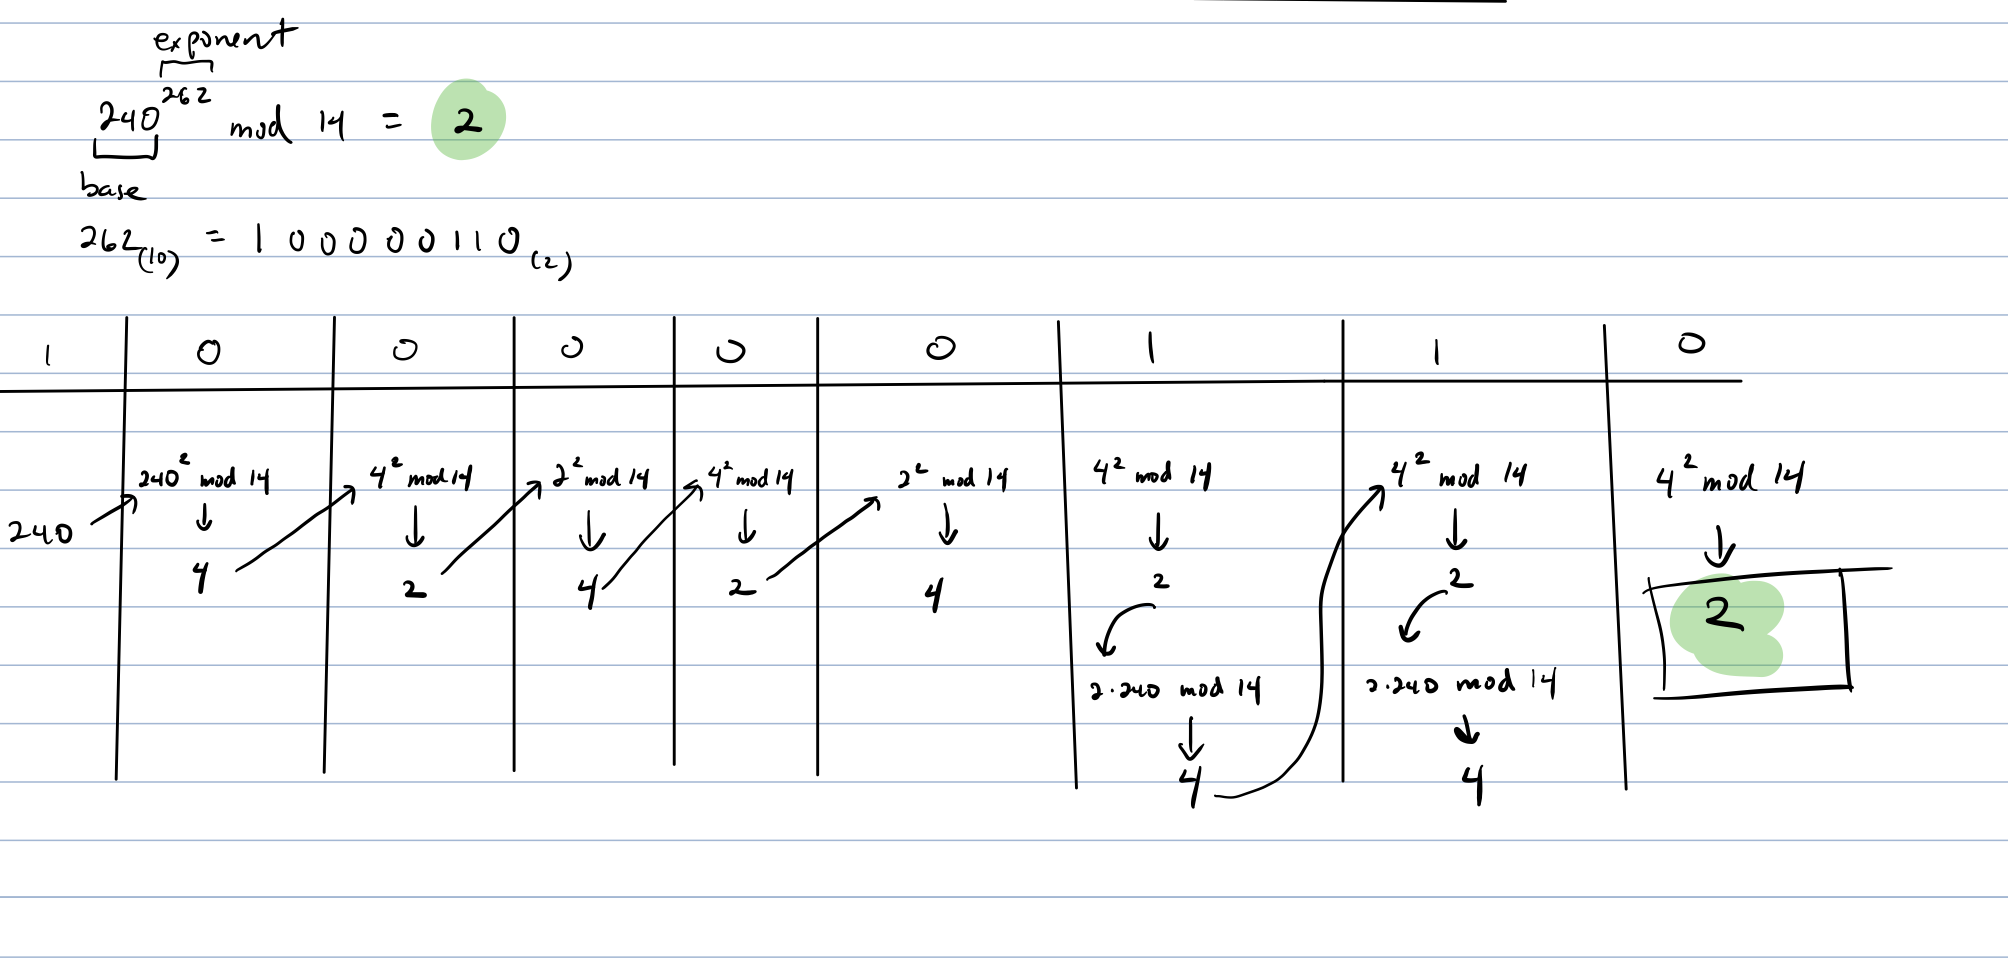

In [23]:
from IPython import display
display.Image("media/fast_modular_exponentiation.png")

In [21]:
# Fast modular exponentiation method

from collections import deque
class Solution:
    def superPow(self, x: int, b: List[int]) -> int:
        N = 1337
        y = int("".join([str(each) for each in b]))

        y = deque([int(digit) for digit in bin(y)[2:]])

        num = y.popleft()
        assert num == 1
        result = x

        while y:
            num = y.popleft()
            if num == 0:
                result = (result*result) % N
            else:
                result = (result*result) % N
                result = (result*x) % N
        return result
